In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-01-12 12:45:42.355345'

In [7]:
import numpy as np
import sys
# sys.path.append('../')
from porousmedialab.column import Column
from scipy import special

In [ ]:
w = 5
tend = 5
dx = 0.1
length = 100
phi = 1
dt = 0.001
lab = Column(length, dx, tend, dt, w)
D = 5
lab.add_species(
    phi,
    'O2',
    D,
    0,
    bc_top_value=1,
    bc_top_type='dirichlet',
    bc_bot_value=0,
    bc_bot_type='dirichlet')
lab.solve()
x = np.linspace(0, lab.length, int(lab.length / lab.dx) + 1)
sol = 1 / 2 * (
    special.erfc((x - lab.w * lab.tend) / 2 / np.sqrt(D * lab.tend)) +
    np.exp(lab.w * x / D) * special.erfc(
        (x + lab.w * lab.tend) / 2 / np.sqrt(D * lab.tend)))

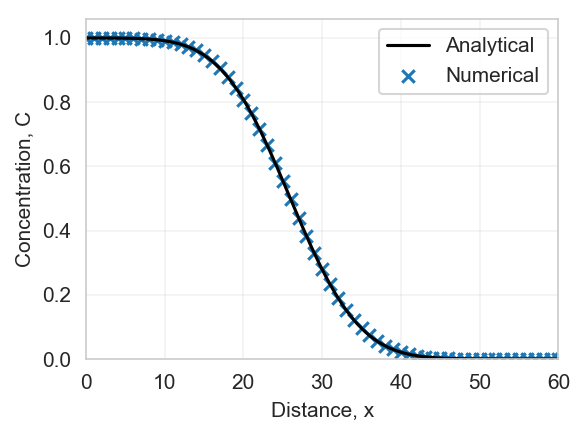

In [14]:
plt.figure(figsize=(4,3), dpi=150)
plt.plot(x, sol, 'k', label='Analytical')
plt.scatter(
    lab.x[::10],
    lab.species['O2'].concentration[:, -1][::10],
    marker='x',
    label='Numerical')
plt.xlim([x[0], x[-1]])
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.grid(linestyle='-', linewidth=0.2)
plt.legend()
plt.tight_layout()
plt.xlim(0,60)
plt.ylim(0,None)
plt.xlabel('Distance, x')
plt.ylabel('Concentration, C')
plt.tight_layout()
plt.savefig('analytical_transport.pdf')